<a href="https://colab.research.google.com/github/yh08037/ABR-Lab-Homework/blob/master/Image_Data_loading_and_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tf.data 를 통해 이미지 로드하기
이 튜토리얼은 ```tf.data```를 활용하여 이미지 데이터를 로드하는 방법의 간단한 예시를 제공한다.

이 예시에서 사용되는 데이터셋은 한 이미지의 클래스 당 한 디렉터리로, 이미지들의 디렉터리들로 구성된다.



## 임포트 및 설정

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    # Only on Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

## 데이터셋 다운로드하고 관찰하기

### 이미지 다운로드하고 도로 가져오기

In [0]:
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

228818944/228813984 [==============================] - 4s 0us/step
/root/.keras/datasets/flower_photos


In [0]:
data_root.is_dir()

True

In [0]:
for item in data_root.iterdir():
    print(item)

/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/LICENSE.txt
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/tulips


In [0]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [0]:
all_image_paths[:10]

['/root/.keras/datasets/flower_photos/dandelion/14058811536_f29cd7bd58_n.jpg',
 '/root/.keras/datasets/flower_photos/daisy/17101762155_2577a28395.jpg',
 '/root/.keras/datasets/flower_photos/daisy/10555826524_423eb8bf71_n.jpg',
 '/root/.keras/datasets/flower_photos/daisy/18400014056_2e4c601ed5.jpg',
 '/root/.keras/datasets/flower_photos/tulips/14087860553_bf4f8ec56d.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/5725836812_a7d1c5540d_m.jpg',
 '/root/.keras/datasets/flower_photos/tulips/3626132563_d955973447_n.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/477207005_6327db8393_m.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/2479491210_98e41c4e7d_m.jpg',
 '/root/.keras/datasets/flower_photos/daisy/16020253176_60f2a6a5ca_n.jpg']

### 이미지 관찰하기

In [0]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

import IPython.display as display
def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

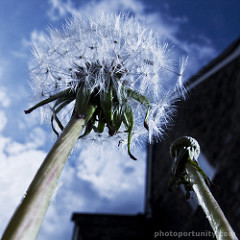

Image (CC BY 2.0)  by the_steve_cox



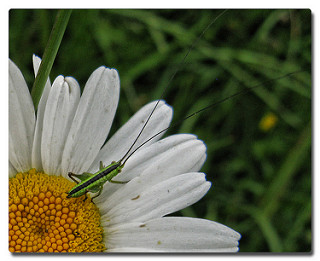

Image (CC BY 2.0)  by Alberto Cabrera



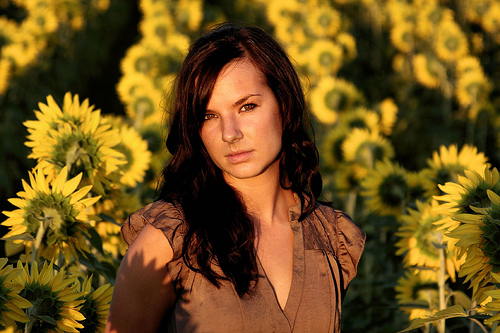

Image (CC BY 2.0)  by jim simonson



In [0]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))
    print()

## 각 이미지에 대한 라벨 정하기

In [0]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [0]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [0]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
print("First 10 labels indices:", all_image_labels[:10])

First 10 labels indices: [1, 0, 0, 0, 4, 1, 4, 1, 1, 0]


## Load and format the images

In [0]:
img_path = all_image_paths[0]
img_path

'/root/.keras/datasets/flower_photos/dandelion/14058811536_f29cd7bd58_n.jpg'

In [0]:
# Here is the raq data
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+'...')

<tf.Tensor: id=91, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`...


In [0]:
# Decode it into and image tensor
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(253, 320, 3)
<dtype: 'uint8'>


In [0]:
# Resize it for model
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


In [0]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image /= 255.0  # normalize to [0, 1] range

    return image

In [0]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

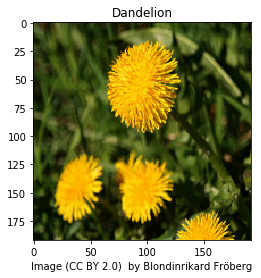

In [0]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

## Build ```tf.data.Dataset```

In [0]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [0]:
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [0]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

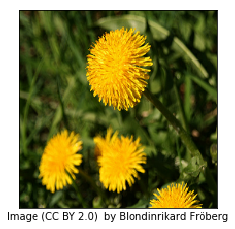

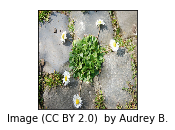

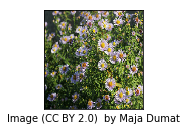

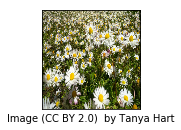

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for n, image in enumerate(image_ds.take(4)):
    plt.subplot(2, 2, n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(caption_image(all_image_paths[n]))
    plt.show()

## A dataset of ```(image, label)``` pairs

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [0]:
for label in label_ds.take(10):
    print(label_names[label.numpy()])

dandelion
daisy
daisy
daisy
tulips
dandelion
tulips
dandelion
dandelion
daisy


In [0]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [0]:
print(image_label_ds)

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


In [0]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# The tuples are unpacked into the positional arguments of the mapped function
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

## Basic methods for training
* To be well shuffled
* To be batched
* To repeat forever
* Batched to be available as soon as possible


In [0]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds


<PrefetchDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [0]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

## Pipe the dataset to a model

In [0]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable = False

In [0]:
def change_range(image, label):
    return 2*image-1, label

keras_ds = ds.map(change_range)

In [0]:
# The dataset may take a few seconds to start, as it fills its shuffle buffer.
image_batch, label_batch = next(iter(keras_ds))

In [0]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 6, 6, 1280)


In [0]:
model = tf.keras.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(len(label_names), activation = 'softmax')])

In [0]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: 0.011936902
max logit: 0.7902271

Shape: (32, 5)


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [0]:
len(model.trainable_variables)

2

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
steps_per_epoch = tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

115.0

In [0]:
model.fit(ds, epochs=1, steps_per_epoch=3)

Train for 3 steps
3/3 [==============================] - 11s 4s/step - loss: 1.8649 - accuracy: 0.2292


## Performance
### simple time function

In [0]:
import time
default_timeit_steps = 2*steps_per_epoch+1

def timeit(ds, steps=default_timeit_steps):
  overall_start = time.time()
  # Fetch a single batch to prime the pipeline (fill the shuffle buffer),
  # before starting the timer
  it = iter(ds.take(steps+1))
  next(it)

  start = time.time()
  for i,(images,labels) in enumerate(it):
    if i%10 == 0:
      print('.',end='')
  print()
  end = time.time()

  duration = end-start
  print("{} batches: {} s".format(steps, duration))
  print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))
  print("Total time: {}s".format(end-overall_start))

In [0]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [0]:
timeit(ds)

........................
231.0 batches: 14.406761169433594 s
513.09242 Images/s
Total time: 21.376484155654907s


### Cache

In [0]:
ds = image_label_ds.cache()
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [0]:
timeit(ds)

........................
231.0 batches: 1.073864459991455 s
6883.55028 Images/s
Total time: 8.004031658172607s


In [0]:
timeit(ds)

........................
231.0 batches: 1.115316390991211 s
6627.71574 Images/s
Total time: 1.1380615234375s


In [0]:
ds = image_label_ds.cache(filename='./cache.tf-data')
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(1)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [0]:
timeit(ds)

........................
231.0 batches: 3.4705522060394287 s
2129.92042 Images/s
Total time: 15.925778150558472s


In [0]:
timeit(ds)

........................
231.0 batches: 3.342576026916504 s
2211.46802 Images/s
Total time: 4.368775367736816s
